In [93]:
import pandas as pd
import random
import numpy as np
import networkx as nx
import math
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import random
import copy
%matplotlib inline

Name: 
Type: DiGraph
Number of nodes: 100
Number of edges: 194
Average in degree:   1.9400
Average out degree:   1.9400


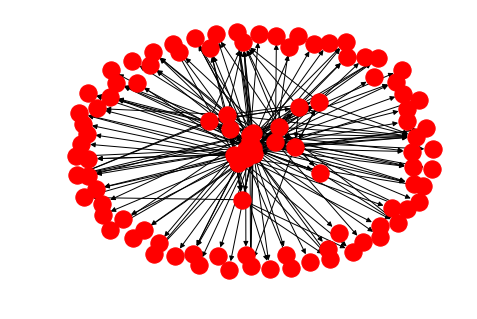

In [100]:
G = nx.DiGraph()
for i in range(1,101):
    G.add_node(i)
with open('out.ego-twitter') as f:
    content = f.readlines()
content = [x.strip() for x in content]
for each in content:
    nums = [int(x) for x in each.split()]
    if((nums[0]<=100) & (nums[1]<=100) & (nums[0] != nums[1]) & (G.has_edge(nums[0],nums[1]) == 0)):
        G.add_edge(nums[0],nums[1],act_prob=1)

pos = nx.spring_layout(G)
print(nx.info(G))
nx.draw(G)
plt.show()

In [101]:
all_degrees = []
normalized_degrees = []

def plot(list_values,xlabel,ylabel,title):
	unique_degrees = list(sorted(set(list_values)))
	count_of_degrees = []
	for i in unique_degrees:
		x = all_degrees.count(i)
		count_of_degrees.append(x)
	plt.title(title)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)
	plt.plot(unique_degrees,count_of_degrees)
	plt.show()

def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    #labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

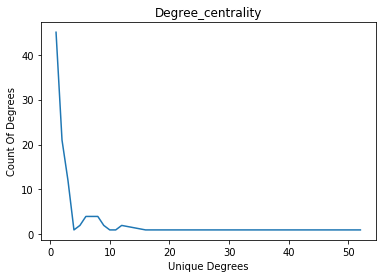

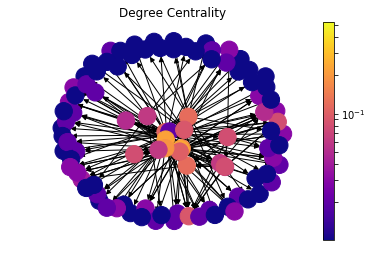

In [102]:
def degree_centrality(G,pos):
	global all_degrees
	all_degrees = [val for (node, val) in G.degree()]
	plot(all_degrees,"Unique Degrees","Count Of Degrees","Degree_centrality")
	draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')
degree_centrality(G,pos)

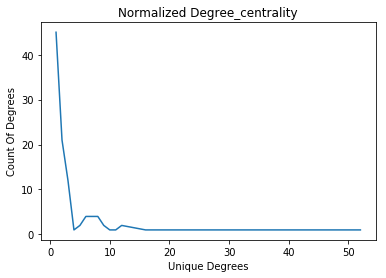

In [103]:
def normalized_degree_centrality(G,pos):
	global normalized_degrees
	n = len(all_degrees)
	v = 1/(n-1)
	for i in range(0,n):
		normalized_degrees.append(v*all_degrees[i])
	plot(all_degrees,"Unique Degrees","Count Of Degrees","Normalized Degree_centrality")
normalized_degree_centrality(G,pos)

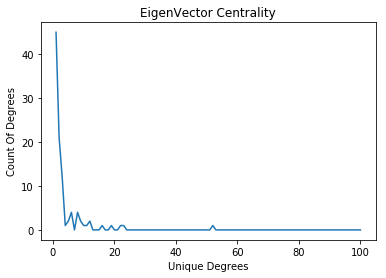

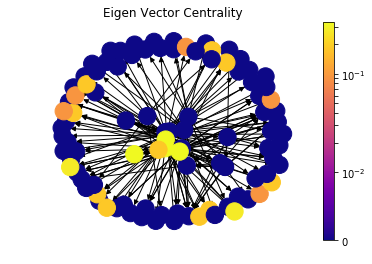

In [104]:
def eigenvector_centrality(G,pos):
	centrality = nx.eigenvector_centrality(G)
	unique_degrees = list(sorted(set(centrality)))
	plot(centrality,"Unique Degrees","Count Of Degrees","EigenVector Centrality")
	draw(G, pos,centrality, 'Eigen Vector Centrality')
eigenvector_centrality(G,pos)

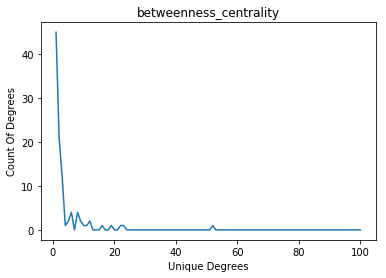

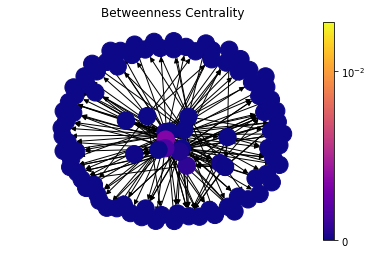

In [105]:
def betweenness_centrality(G,pos):
	centrality = nx.betweenness_centrality(G);
	unique_degrees = list(sorted(set(centrality)))
	plot(centrality,"Unique Degrees","Count Of Degrees","betweenness_centrality")
	draw(G, pos,centrality, 'Betweenness Centrality')
betweenness_centrality(G,pos)

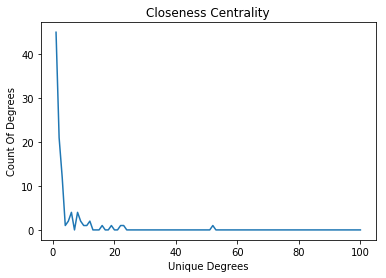

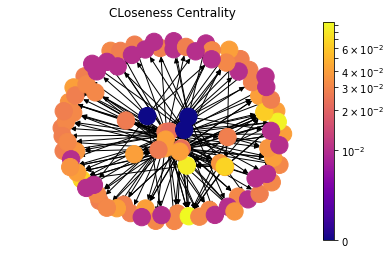

In [106]:
def closeness_centrality(G,pos):
	centrality = nx.closeness_centrality(G)
	unique_degrees = list(sorted(set(centrality)))
	plot(centrality,"Unique Degrees","Count Of Degrees","Closeness Centrality")
	draw(G, pos,centrality, 'CLoseness Centrality')
closeness_centrality(G,pos)


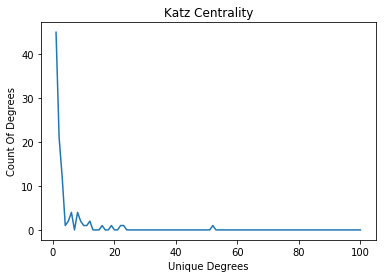

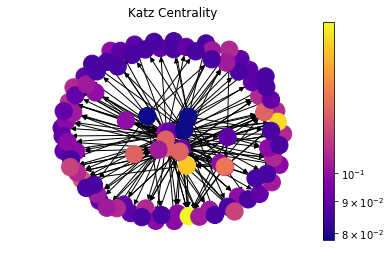

In [107]:
def katz_centrality(G,pos):
	centrality = nx.katz_centrality(G)
	unique_degrees = list(sorted(set(centrality)))
	plot(centrality,"Unique Degrees","Count Of Degrees","Katz Centrality")
	draw(G, pos,centrality, 'Katz Centrality')
katz_centrality(G,pos)

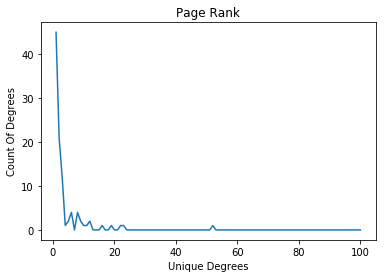

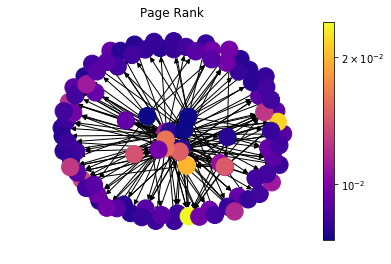

In [108]:
def page_rank(G,pos):
	centrality=nx.pagerank(G)
	unique_degrees = list(sorted(set(centrality)))
	plot(centrality,"Unique Degrees","Count Of Degrees","Page Rank")
	draw(G, pos,centrality, 'Page Rank')
page_rank(G,pos)

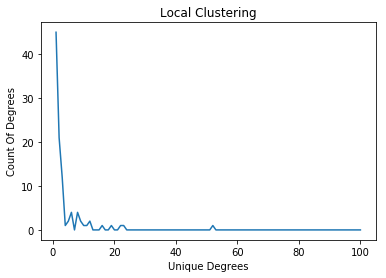

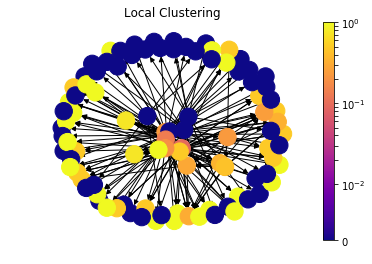

In [109]:
def local_clustering(G,pos):
	centrality = nx.clustering(G)
	unique_degrees = list(sorted(set(centrality)))
	plot(centrality,"Unique Degrees","Count Of Degrees","Local Clustering")
	draw(G,pos,centrality, 'Local Clustering')
local_clustering(G,pos)

In [110]:
def values(G):
    centrality = nx.average_clustering(G)
    print ("Average Clustering Coefficient: " + str(centrality))
    transitivity = nx.transitivity(G)
    print("Transtivity is: " + str(transitivity))
values(G)

Average Clustering Coefficient: 0.334449218545333
Transtivity is: 0.053929121725731895


In [111]:
def plot_g(n,k):
    p=k/(n-1)
    print("VALUE OF P:",p)
    print("VALUE OF k:",k)
    G=nx.erdos_renyi_graph(n, p, seed=None, directed=True)
    nx.draw(G)

VALUE OF P: 0.0016032064128256513
VALUE OF k: 0.8


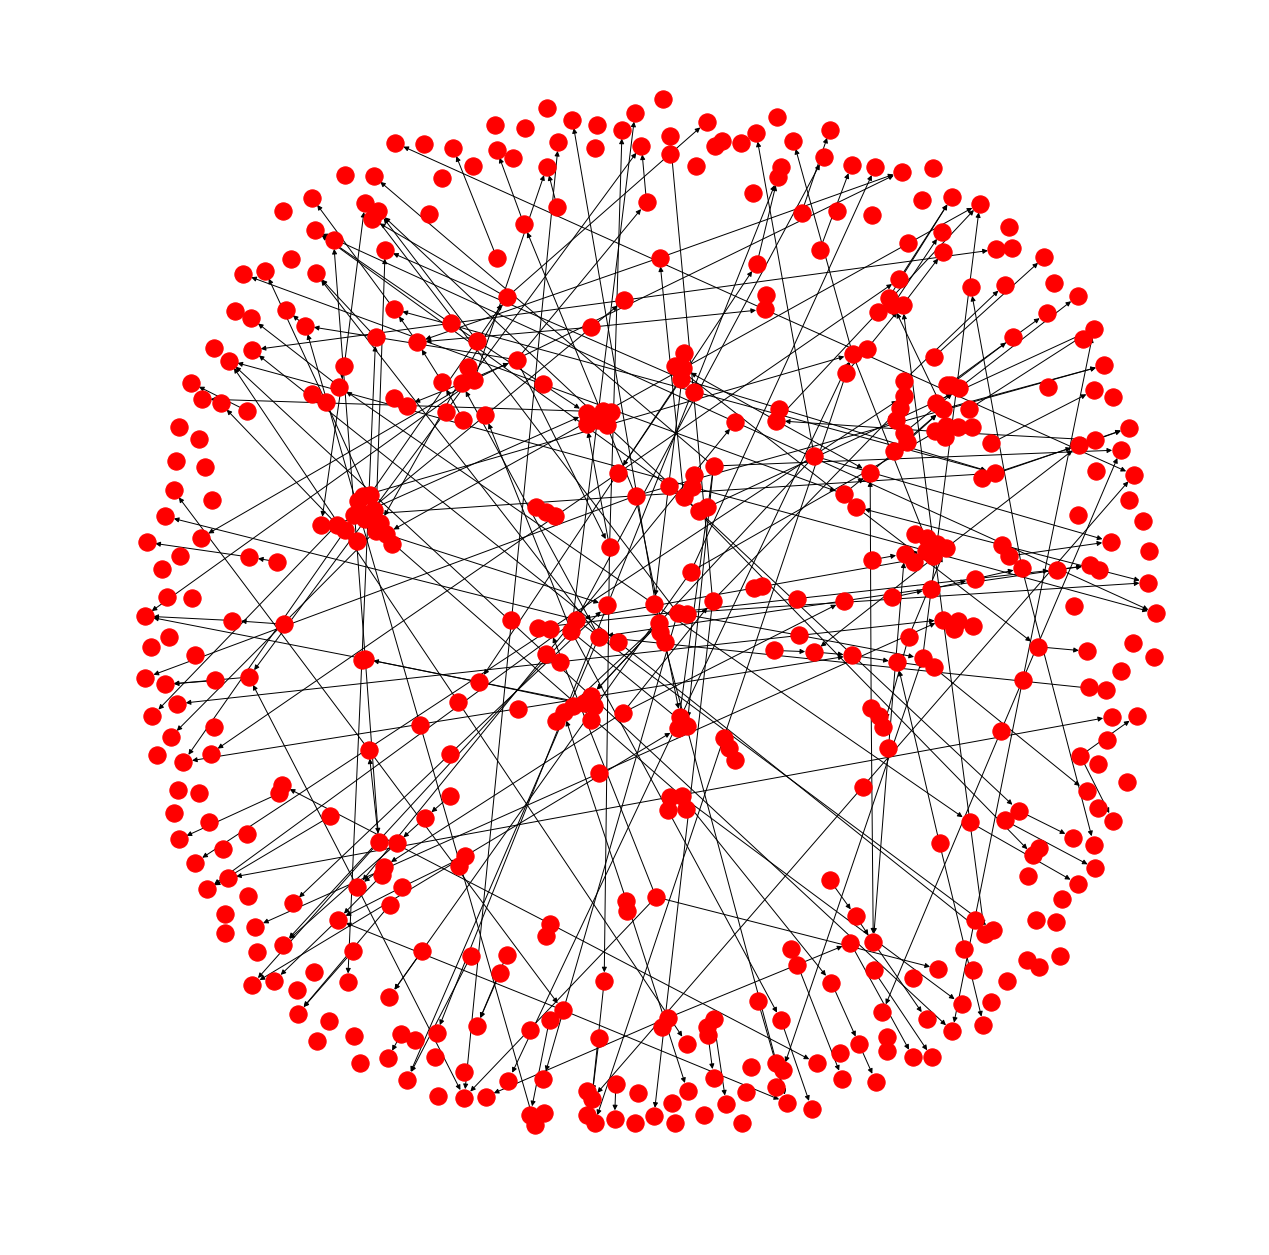

VALUE OF P: 0.002004008016032064
VALUE OF k: 1


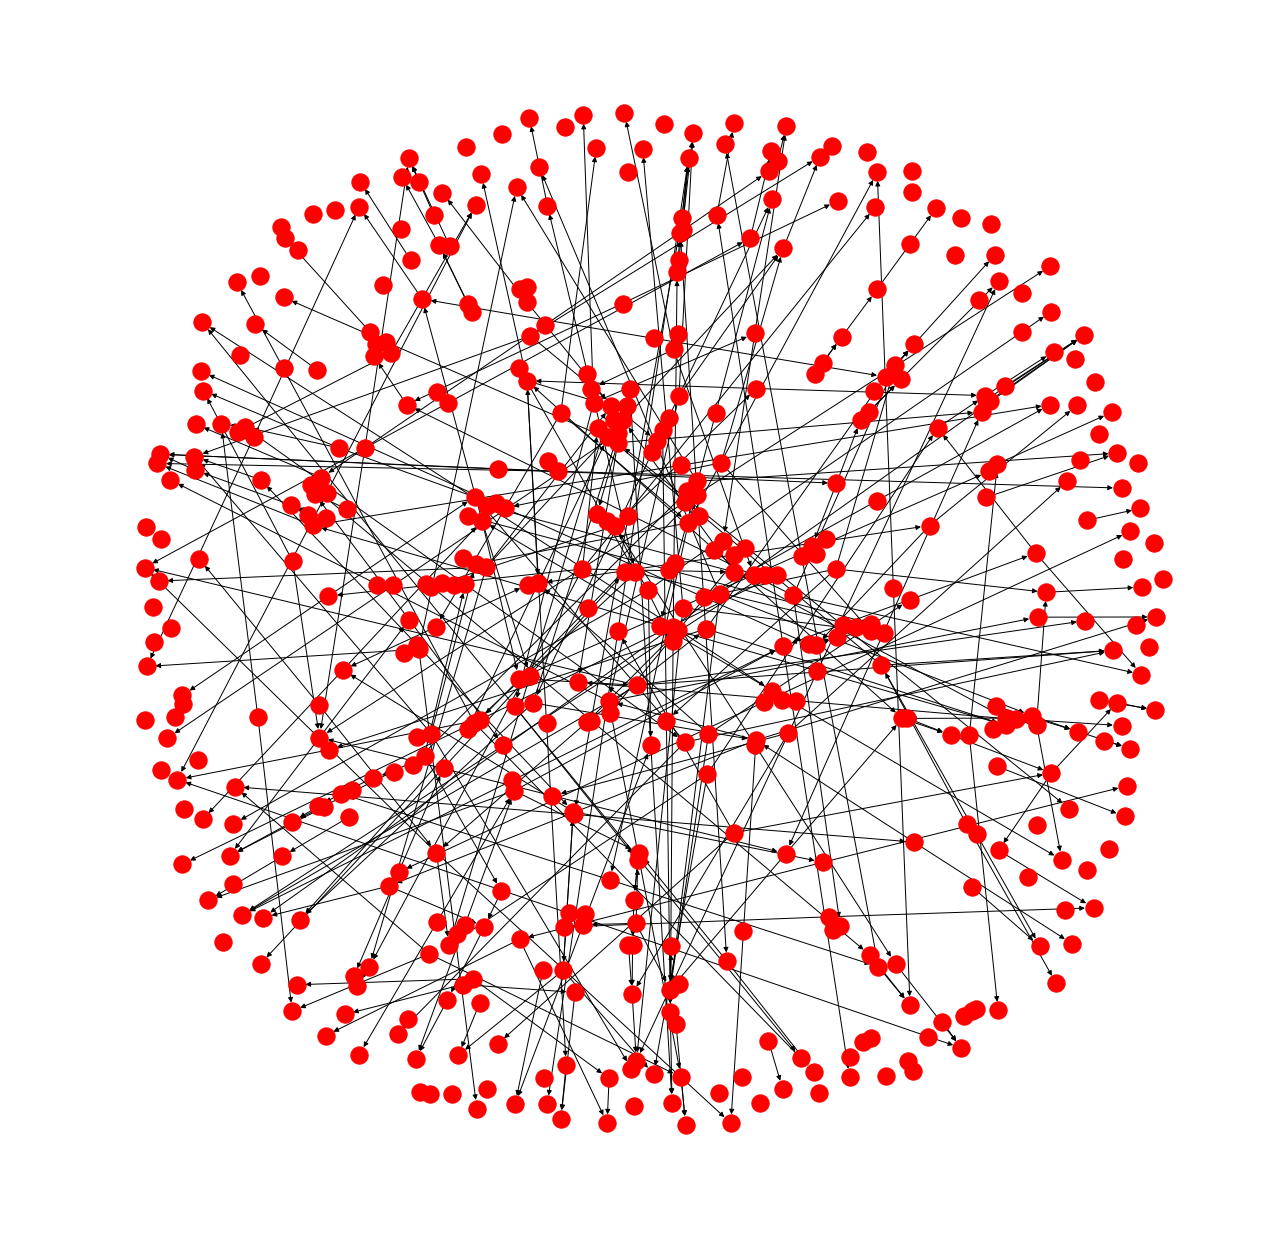

VALUE OF P: 0.01603206412825651
VALUE OF k: 8


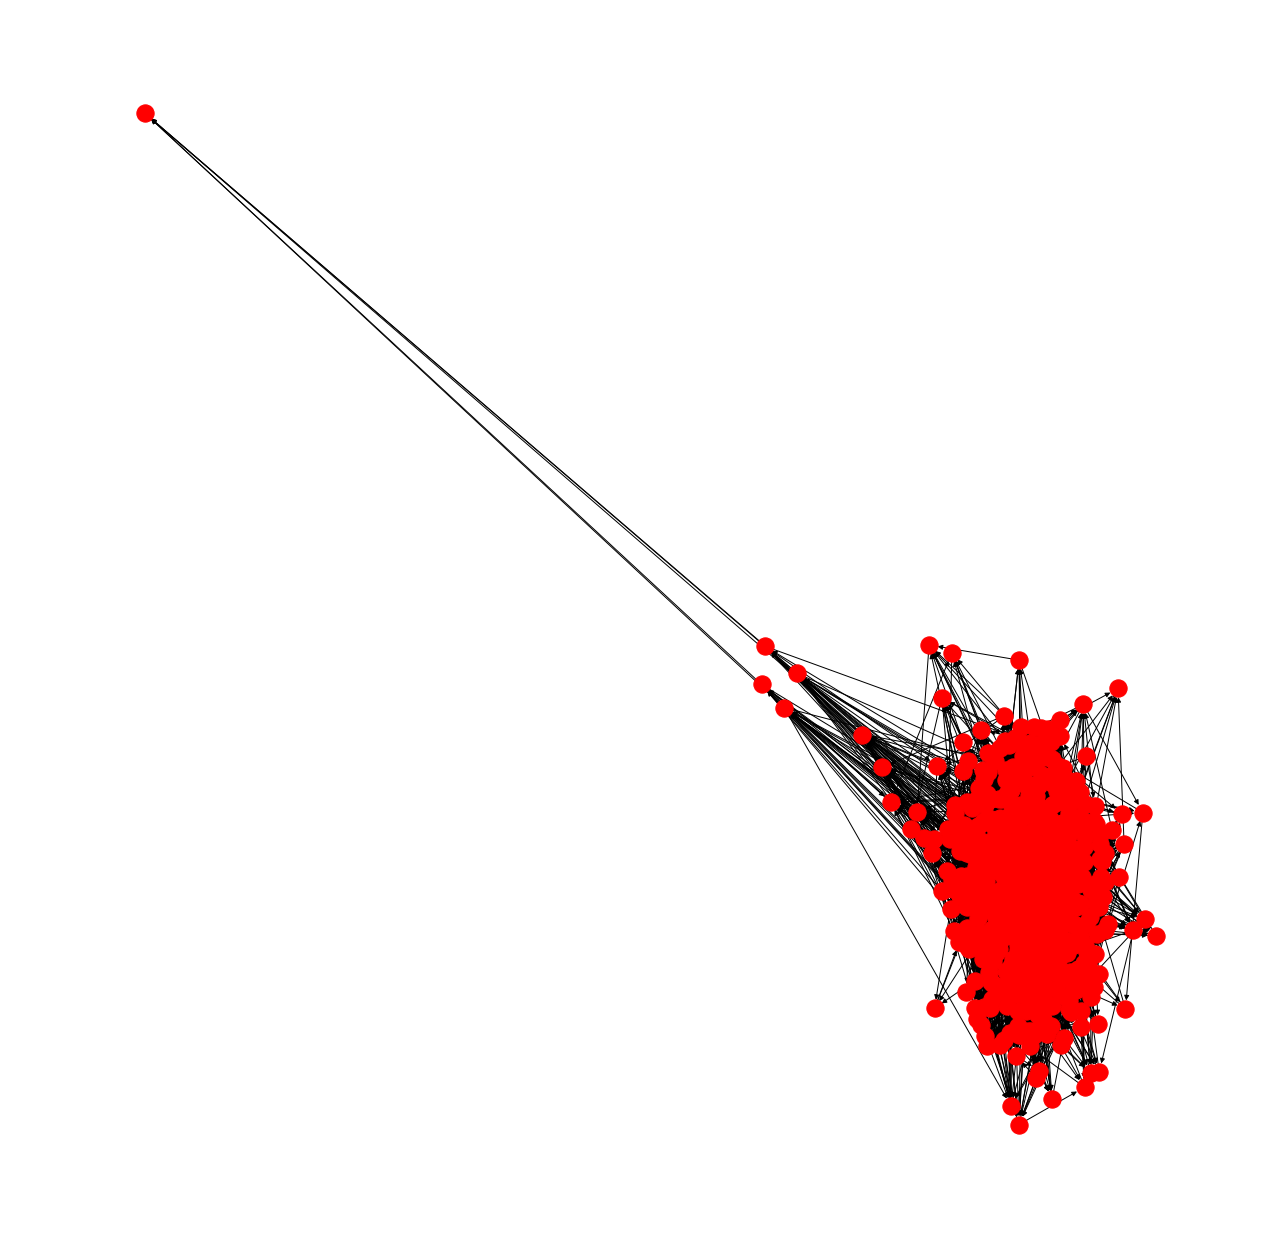

In [112]:
n=500
i=0
k =[0.8,1,8] 
for i in k:
    plt.figure(figsize=(17,17))
    plot_g(n,i)
    plt.pause(0.00001)

In [113]:
from networkx import edge_betweenness_centrality
from random import random
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.kclique import k_clique_communities

def most_valuable_edge(G):
    centrality = edge_betweenness_centrality(G)
    max_cent = max(centrality.values())
    # Scale the centrality values so they are between 0 and 1,
    # and add some random noise.
    centrality = {e: c / max_cent for e, c in centrality.items()}
    # Add some random noise.
    centrality = {e: c + random() for e, c in centrality.items()}
    return max(centrality, key=centrality.get)
gn_generator = girvan_newman(G, most_valuable_edge)
from itertools import islice
gn_communities = next(islice(gn_generator, 3, None)) # Do 3 iterations only


In [114]:

gn_dict_communities = {}

for i, c in enumerate(gn_communities):
    for node in c:
        gn_dict_communities[node] = i + 1
        
for node in G:
    if node not in gn_dict_communities.keys():
        gn_dict_communities[node] = -1

In [115]:
#girvan Newman
def community_layout(g, partition):
    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos


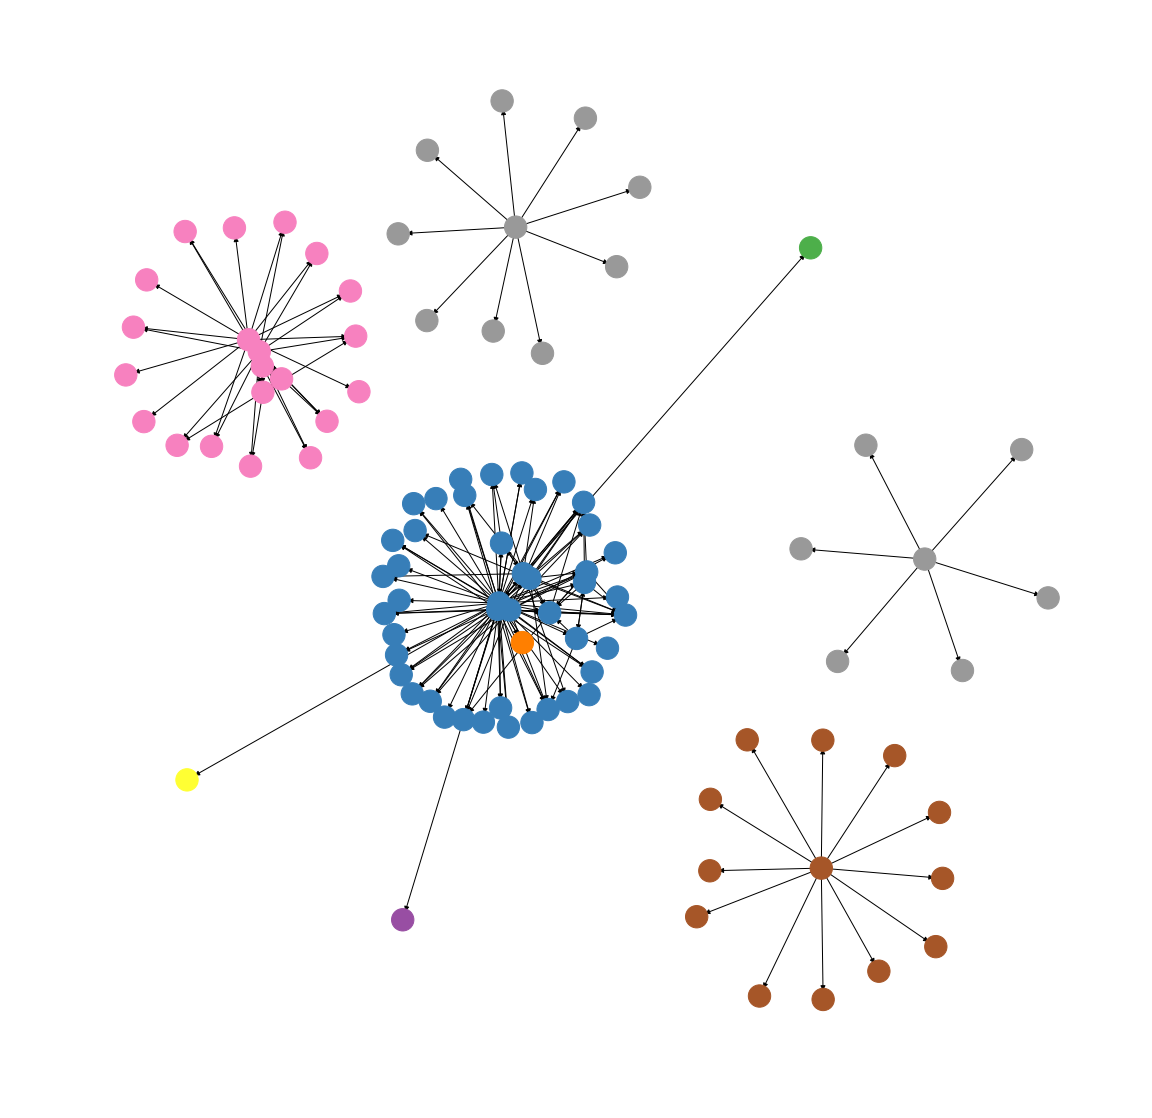

In [116]:
gn_pos = community_layout(G, gn_dict_communities)
from matplotlib import cm
gn_colors = []
for node in G.nodes:
    gn_colors.append(cm.Set1(gn_dict_communities[node]))
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(G, gn_pos, node_color=gn_colors, node_size=500)
nx.draw_networkx_edges(G, gn_pos,alpha=1)
plt.axis('off')
plt.show()

In [117]:
#CPM
from collections import defaultdict
class CPM():
    
    def __init__(self,H,k=4):
        self._H = H
        self._k = k

    def execute(self):
        # find all cliques which size > k
        cliques = list(nx.find_cliques(H))
        vid_cid = defaultdict(lambda:set())
        for i,c in enumerate(cliques):
            if len(c) < self._k:
                continue
            for v in c:
                vid_cid[v].add(i)
        
        # build clique neighbor
        clique_neighbor = defaultdict(lambda:set())
        remained = set()
        for i,c1 in enumerate(cliques):
            #if i % 100 == 0:
                #print i
            if len(c1) < self._k:
                continue
            remained.add(i)
            s1 = set(c1)
            candidate_neighbors = set()
            for v in c1:
                candidate_neighbors.update(vid_cid[v])
            candidate_neighbors.remove(i)
            for j in candidate_neighbors:
                c2 = cliques[j]
                if len(c2) < self._k:
                    continue
                if j < i:
                    continue
                s2 = set(c2)
                if len(s1 & s2) >= min(len(s1),len(s2)) -1:
                    clique_neighbor[i].add(j)
                    clique_neighbor[j].add(i) 
        
        # depth first search clique neighbors for communities
        communities = []
        for i,c in enumerate(cliques):
            if i in remained and len(c) >= self._k:
                #print 'remained cliques', len(remained)
                communities.append(set(c))
                neighbors = list(clique_neighbor[i])
                while len(neighbors) != 0:
                    n = neighbors.pop()
                    if n in remained:
                        #if len(remained) % 100 == 0:
                            #print 'remained cliques', len(remained)
                        communities[len(communities)-1].update(cliques[n])
                        remained.remove(n)
                        for nn in clique_neighbor[n]:
                            if nn in remained:
                                neighbors.append(nn)
        return communities

[{1, 5, 7, 8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 27, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49}, {64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 78, 82, 83, 63}]
{1: 0, 2: 2, 3: 2, 4: 2, 5: 0, 6: 2, 7: 0, 8: 0, 9: 2, 10: 2, 11: 0, 12: 2, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 2, 23: 2, 24: 0, 25: 0, 26: 2, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 2, 33: 0, 34: 2, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 2, 43: 0, 44: 0, 45: 0, 46: 2, 47: 0, 48: 0, 49: 0, 50: 2, 51: 2, 52: 2, 53: 2, 54: 2, 55: 2, 56: 2, 57: 2, 58: 2, 59: 2, 60: 2, 61: 2, 62: 2, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 2, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 2, 78: 1, 79: 2, 80: 2, 81: 2, 82: 1, 83: 1, 84: 2, 85: 2, 86: 2, 87: 2, 88: 2, 89: 2, 90: 2, 91: 2, 92: 2, 93: 2, 94: 2, 95: 2, 96: 2, 97: 2, 98: 2, 99: 2, 100: 2}


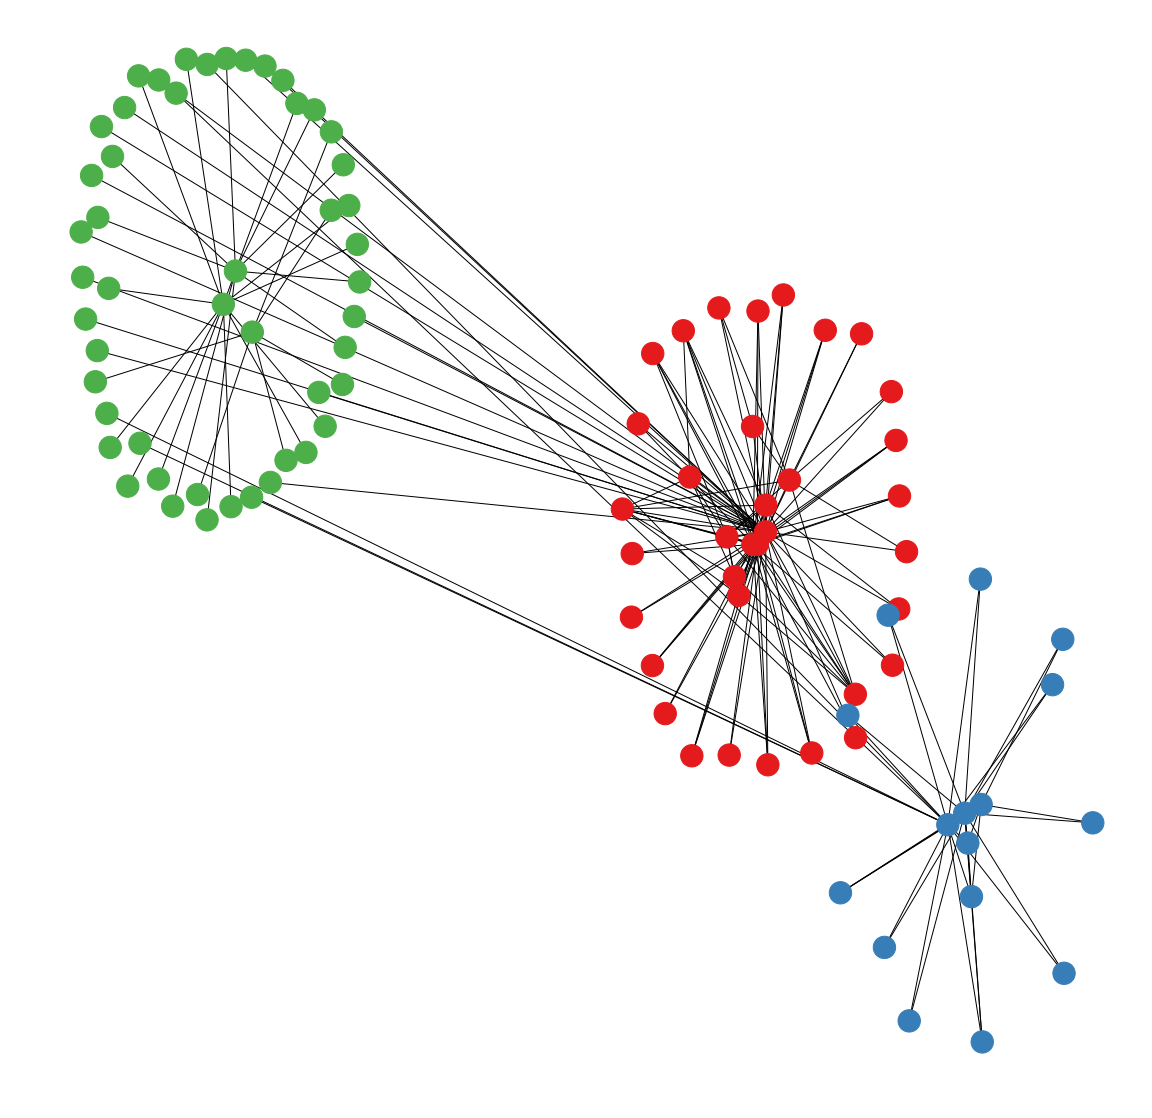

In [121]:
H = G.to_undirected()
algorithm = CPM(H, 3)
communities = algorithm.execute()
print(communities) #inset
final_dict = {}
for i in range(1,101):
    flag=0
    for j in range(0,len(communities)):
        if (i in communities[j]):
            final_dict[i] = j
            flag=1
    if(flag == 0):
        final_dict[i] = len(communities)
print(final_dict)
gn_pos = community_layout(G, final_dict)
from matplotlib import cm
gn_colors = []
for node in G.nodes:
    gn_colors.append(cm.Set1(final_dict[node]))
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(H, gn_pos, node_color=gn_colors, node_size=500)
nx.draw_networkx_edges(H, gn_pos,alpha=1)
plt.axis('off')
plt.show()
            